# Fitting a distribution to observations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Problem 1:

We have the following field data for time to failure of a pump (in hours): 

3568 2599 3681 3100 2772 3272 3529 1770 2951 3024 3761 3671 2977 3110 2567 3341 2825 3921 2498 2447 3615 2601 2185 3324 2892 2942 3992 2924 3544 3359 2702 3658 3089 3272 2833 3090 1879 2151 2371 2936

What is the probability that the pump will fail after it has worked for at least 2000 hours? Provide a 95% confidence interval for your estimate.

Steps:
- Fit a normal distibution.
- Use *bootstrap_confidence_intervals* to calculate probability and confidence interval.

In [2]:
pump=[3568, 2599, 3681, 3100, 2772, 3272, 3529, 1770, 2951, 3024, 3761, 3671, 2977, 3110, 2567, 3341, 2825, 3921, 2498, 2447, 3615, 2601, 2185, 3324, 2892, 2942, 3992, 2924, 3544, 3359, 2702, 3658, 3089, 3272, 2833, 3090, 1879, 2151, 2371, 2936]

Text(0.5, 0, 'Time to failure of a pump')

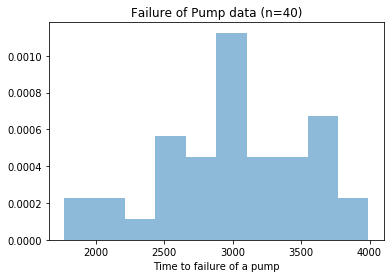

In [3]:
N = len(pump)

plt.hist(pump, density=True, alpha=0.5)
plt.title("Failure of Pump data (n={})".format(N))
plt.xlabel("Time to failure of a pump")

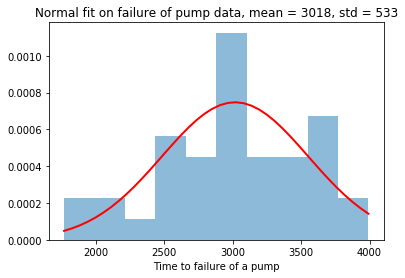

In [4]:
import scipy.stats

plt.hist(pump, density=True, alpha=0.5)

mu, std = scipy.stats.norm.fit(pump)
x = np.linspace(min(pump), max(pump),40)
p = scipy.stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)
plt.title("Normal fit on failure of pump data, mean = %d, std = %d" %(mu,std))
plt.xlabel("Time to failure of a pump")

plt.show()

In [5]:
def bootstrap_confidence_intervals(data, estimator, percentiles, runs=1000):
    replicates= np.empty(runs)
    for i in range(runs):
        replicates[i]= estimator(np.random.choice(data,len(data), replace=True))
    est= np.mean(replicates)
    ci = np.percentile(np.sort(replicates), percentiles)
    return(est, ci)

In [6]:
def estimator_(pump):
    mu, std = scipy.stats.norm.fit(pump)
    return 1-scipy.stats.norm(mu, std).cdf(2000)

percentiles=[2.5,97.5]
bootstrap_confidence_intervals(pump,estimator_, percentiles, runs=1000)

(0.9706681629713838, array([0.92671597, 0.9949824 ]))

## Problem 2:
Let us examine a histogram of wind speed data from TLSairport, in 2013.

https://risk-engineering.org/static/data/TLS-weather-data-2013.csv

Steps:
- Plot the distribution of the column "Mean Wind SpeedKm/h".
- Fit a normal distribution.
- Examine QQ-plot and do a KS test.
- How good is the fit?

- Try to fit a lognormal distribution.
- Examine QQ-plot and do a KS test.
- How good is the fit compared to the normal distribution?

In [7]:
data_2 = pd.read_csv("https://risk-engineering.org/static/data/TLS-weather-data-2013.csv", header=0, squeeze=True)

In [8]:
data_2.head()

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,2013-1-1,12,9,6,8,7,5,93,86,76,...,31,10,5,26,14,NaN,5.08,7.0,Rain,234
1,2013-1-2,9,7,4,6,4,2,93,86,71,...,31,11,10,23,16,NaN,0.00,5.0,NaN,298
2,2013-1-3,8,4,0,4,2,-1,100,87,69,...,19,10,10,13,5,NaN,0.00,5.0,NaN,118
3,2013-1-4,7,6,5,7,6,4,100,94,83,...,10,6,1,10,5,NaN,0.00,8.0,Fog,292
4,2013-1-5,7,6,5,6,6,4,100,94,90,...,11,9,2,16,8,NaN,0.00,8.0,NaN,306


In [9]:
data_2.columns

Index(['CET', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       'Mean Humidity', 'Min Humidity', 'Max Sea Level PressurehPa',
       'Mean Sea Level PressurehPa', 'Min Sea Level PressurehPa',
       'Max VisibilityKm', 'Mean VisibilityKm', 'Min VisibilitykM',
       'Max Wind SpeedKm/h', 'Mean Wind SpeedKm/h', 'Max Gust SpeedKm/h',
       'Precipitationmm', 'CloudCover', 'Events', 'WindDirDegrees'],
      dtype='object')

In [10]:
data_2[['Mean Wind SpeedKm/h']].head()

,Mean Wind SpeedKm/h
0,14
1,16
2,5
3,5
4,8


Text(0.5, 0, 'Wind Speed, Km/h')

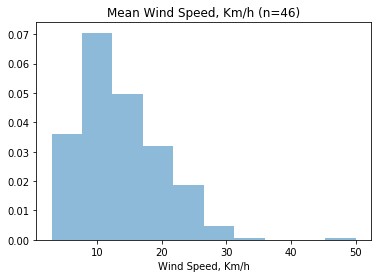

In [11]:
N = 46 #non-missing values

windspeed=data_2['Mean Wind SpeedKm/h']

plt.hist(windspeed, density=True, alpha=0.5)
plt.title("Mean Wind Speed, Km/h (n={})".format(N))
plt.xlabel("Wind Speed, Km/h")

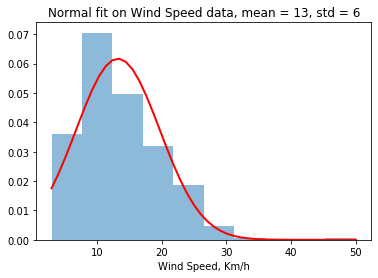

In [12]:
plt.hist(windspeed, density=True, alpha=0.5)

mu, std = scipy.stats.norm.fit(windspeed)
x = np.linspace(min(windspeed), max(windspeed),46)
p = scipy.stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)
plt.title("Normal fit on Wind Speed data, mean = %d, std = %d" %(mu,std))
plt.xlabel("Wind Speed, Km/h")

plt.show()

Text(0.5, 1.0, 'Normal QQ-plot of Wind Speed data')

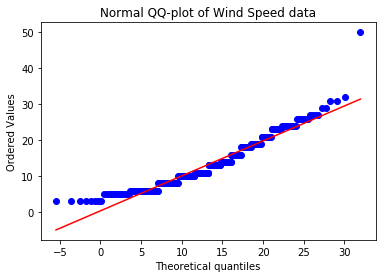

In [13]:
scipy.stats.probplot(windspeed, sparams=(mu, std), dist='norm', plot=plt.figure().add_subplot(111))

plt.title("Normal QQ-plot of Wind Speed data")

In [14]:
from scipy.stats import kstest
kstest(windspeed, "norm")

KstestResult(statistic=0.9986501019683699, pvalue=0.0)

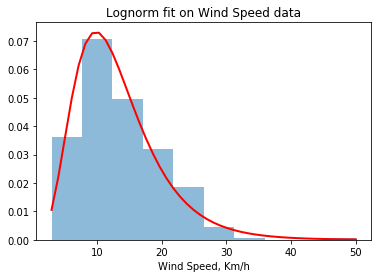

In [15]:
plt.hist(windspeed, density=True, alpha=0.5)


s, mu, std =scipy.stats.lognorm.fit(windspeed)
x = np.linspace(min(windspeed), max(windspeed),46)
p = scipy.stats.lognorm.pdf(x, s, mu, std)
plt.plot(x, p, 'r', linewidth=2)
plt.title("Lognorm fit on Wind Speed data")
plt.xlabel("Wind Speed, Km/h")

plt.show()

Text(0.5, 1.0, 'Lognorm QQ-plot of Wind Speed data')

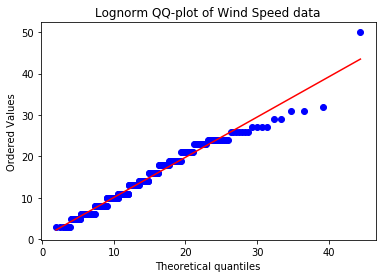

In [16]:
scipy.stats.probplot(windspeed, sparams=(s, mu, std), dist='lognorm', plot=plt.figure().add_subplot(111))

plt.title("Lognorm QQ-plot of Wind Speed data")

In [17]:
kstest(windspeed,  "lognorm", scipy.stats.lognorm.fit(windspeed))

KstestResult(statistic=0.0754445241784745, pvalue=0.029747000164761738)

Lognorm is a better fit for wind speed data at 0.99 level of confidence.

## Problem 3

1. Download heat flow meter data collected by B. Zarr (NIST, 1990)

https://www.itl.nist.gov/div898/handbook/eda/section4/eda4281.htm

2. Plot a histogram for the data

3. Generate a normal quantile-quantile plot to check whether the measurements fit a normal (Gaussian) distribution.

4. Fit a normal distribution to the data.

5. Calculate the mean and the standard deviation.

6. Do a KS test.

7. Estimate the 95% confidence interval for the population mean, using the bootstrap technique.

In [18]:
calibration = pd.read_csv("https://www.itl.nist.gov/div898/handbook/datasets/ZARR13.DAT", squeeze=True, skiprows=25)

In [19]:
calibration

0      9.299992
1      9.277895
2      9.305795
3      9.275351
4      9.288729
         ...   
189    9.232963
190    9.234956
191    9.216746
192    9.274107
193    9.273776
Name: 9.206343, Length: 194, dtype: float64

(9.15, 9.35)

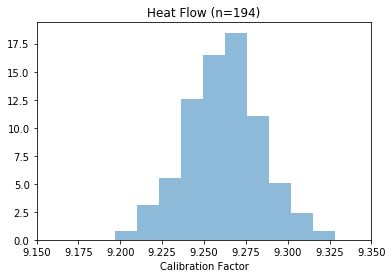

In [20]:
N = len(calibration)

plt.hist(calibration, density=True, alpha=0.5)
plt.title("Heat Flow (n={})".format(N))
plt.xlabel("Calibration Factor")
plt.xlim(9.15,9.35)

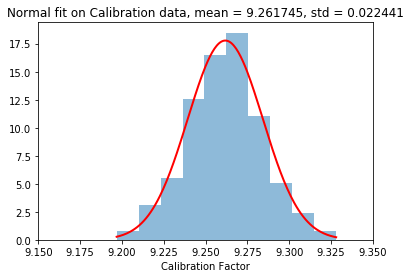

In [21]:
plt.hist(calibration, density=True, alpha=0.5)

mu, std = scipy.stats.norm.fit(calibration)
x = np.linspace(calibration.min(), calibration.max(),194)
p = scipy.stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)
plt.title("Normal fit on Calibration data, mean = %.6f, std = %.6f" %(mu,std))
plt.xlabel("Calibration Factor")
plt.xlim(9.15,9.35)

plt.show()

In [22]:
print("Mean: %.6f"%(mu))
print("Standard Deviation: %.6f"%(std))

Mean: 9.261745
Standard Deviation: 0.022441


In [23]:
kstest(calibration, "norm")

KstestResult(statistic=1.0, pvalue=0.0)

In [24]:
percentiles=[2.5,97.5]
bootstrap_confidence_intervals(calibration, np.mean, percentiles, runs=1000)

(9.261676376541239, array([9.25873398, 9.26503103]))